Introduction to Artificial Intelligence - Supervised Learning lab Session Part 1
--
At the end of this session, you will be able to : 
- Perform basic supervised learning tasks using sklearn
- Generate PyRat Datasets for a supervised learning setting
- Apply supervised learning on PyRat datasets, in two cases 

In [3]:
# The tqdm package is useful to visualize progress with long computations. 
# Install it using pip 
import tqdm

import numpy as np
import ast
import os

Basics of machine learning using sklearn
--

sklearn is a very powerful package that implements most machine learning methods. sklearn also includes cross-validation procedures in order to prevent overfitting, many useful metrics and data manipulation techniques that enables very careful experimentations with machine learning. It is also very straightforward to use. We will introduce a few basic concepts of sklearn. 

First, it is very easy to simulate data with sklearn. 

In [4]:
from sklearn.datasets import make_blobs

Use the function make_blobs to generate clouds of points with $d=2$, and visualize them using the function scatter from matplotlib.pyplot. You can generate as many samples as you want.

You can generate several clouds of points using the argument centers. We recommend using random_state=0 so that your results are from the same distribution from our tests 

Vocabulary : n_samples is the number of generated samples, n_features is $d$ (number of dimensions), centers are the number of classes. 

hint : you can use the output "y" as an argument for the color argument ("c") of the scatter function

In [5]:
### CELL TO BE COMPLETED - generate blobs
x, y = make_blobs(n_samples=3000, n_features=2, cluster_std=1.7, centers=10)

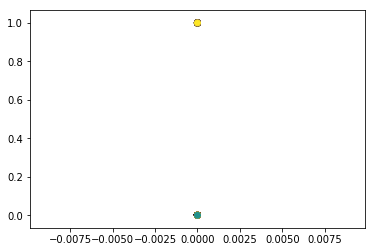

In [55]:
### CELL TO BE COMPLETED -  plot
import matplotlib.pyplot as pl
%matplotlib inline
### Don't forget to import pyplot and use %matplotlib inline
pl.scatter(x[:,0], x[:,1], c=y)

You can use the other arguments from make_blobs in order to change the variance of the blobs, or the coordinates of their center. You can also experiment in higher dimension, although it becomes difficult to visualize. 

sklearn has many other data generators, as well as ways to load standard datasets of various sizes. Check them out here : 

http://scikit-learn.org/stable/datasets/index.html


Now that we have generated a simple dataset, let's try to do a basic supervised learning approach. 

First, in order to mesure the model capability of generalizing, we will have to split the dataset into a training set and a test set. This split is also called cross validation. The test set is a part of your dataset that your model will not see during the training and will be used as a proxy for your "real world" examples.

<center><img src="https://cdn-images-1.medium.com/max/1600/1*u03UsvBGwkYD4E7BObpcaw.png"></center>
<center><small>Image taken from https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8</small></center>

Sklearn has functions to do so, with parameters controlling how to split the dataset so we are going to be showing how you should do. 

Use the train_test_split function in order to generate x_train,x_test, y_train, y_test, from the blobs we just generated, here we split the dataset in 80% train and 20% test. We use random_state = 0 so that the function always returns the same split.

In [7]:
from sklearn.model_selection import train_test_split

#### CELL TO BE COMPLETED 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Check the shapes of the generated vectors

In [8]:
x_train.shape,x_test.shape,x.shape

((2400, 2), (600, 2), (3000, 2))

Let's use a K-Nearest Neighbor classifier to test whether we can classify this data. Create a <b>classifier</b>, train it using your <b> training set </b> and evaluate it by its <b>accuracy</b> on both <b>the train and test sets</b>. 

A k-nearest neighbor classifier (also known as KNN) is a method where for each object that you want to predict the class you look at the K (an hyperparameter) nearest examples from the training (using a distance metric, in our case the euclidean distance). This object is then classified by a majority vote from those neighbors, in other words the object is predicted with the most common class among its neighbours.

To use a Nearest Neighbor with sklearn you have to use the class [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

The sklearn API is consistent between the methods. This means that for almost every method they propose you can train it using [object.fit](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit), you can use it to make prediction with [object.predict](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict) and finally verify the <b>accuracy</b> of the method using [object.score](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
classifier = KNeighborsClassifier(n_neighbors=k,n_jobs=1)

### CELL TO BE COMPLETED - train the classifier and get the accuracy in both sets.

classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)
classifier.score(x_test, y_test)

0.8466666666666667

Your classifier should have a train accuracy of 1, while the test accuracy should be high but not perfect.

This is caused by the bias-variance trade-off. The 1NN classifier always has a bias of 0 (it perfectly classifies the training set) but it should have a high variance given that having one more example in the training set can completely change a decision.

To try to avoid having such a high variance, test different values of k and plot the accuracies given the different values of the hyperparameter k. 

If you have time we advise you to do the same analysis but varying the train/test split size.

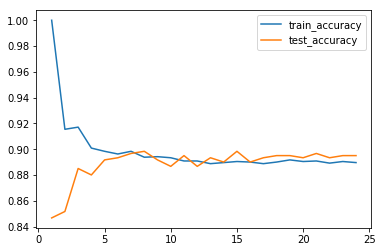

In [10]:
train_acc = list()
test_acc = list() # list to add the test set accuracies
test_ks = range(1,25)# list containing values of k to be tested

# CELL TO BE COMPLETED - Train networks with varying k
for k in test_ks:
    classifier_k = KNeighborsClassifier(n_neighbors=k,n_jobs=1)
    classifier_k.fit(x_train, y_train)
    test_acc.append(classifier_k.score(x_test, y_test))
    train_acc.append(classifier_k.score(x_train, y_train))

pl.figure()
pl.plot(test_ks, train_acc, label='train_accuracy')
pl.plot(test_ks, test_acc, label='test_accuracy')
pl.legend()
pl.show()

With the classifier trained, bias-variance analysed, it is now time to look at other metrics based on your results. It is important to remember that accuracy is a key metric, but it is not the <b> only </b> metric you should be focusing on.

We are going to be printing a [classification report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) and the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for both the training and test sets

In the classification report we are going to see 3 new metrics. They are really important because the accuracy does not show a complete portrait of your results.

* Precision: What is the percentage of cases that your model was correct while predicting the given class
* Recall: What is the percentage of cases that your model was correct when the example was a member of the given class.
* F1 Score: The harmonic mean from precision and recall.

Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       243
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00       248
           4       1.00      1.00      1.00       234
           5       1.00      1.00      1.00       240
           6       1.00      1.00      1.00       241
           7       1.00      1.00      1.00       237
           8       1.00      1.00      1.00       231
           9       1.00      1.00      1.00       235

   micro avg       1.00      1.00      1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400

[[253   0   0   0   0   0   0   0   0   0]
 [  0 243   0   0   0   0   0   0   0   0]
 [  0   0 238   0   0   0   0   0   0   0]
 [  0   0   0 248   0   0   0   0   0   0]
 [  0   0   0   0 234   0   0   0   0   0]
 [  0   0   

Text(0, 0.5, 'Predicted class')

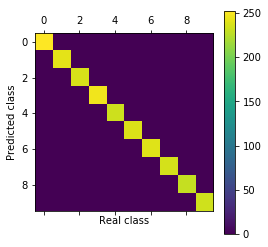

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred_train = classifier.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
print("Training Set:")
print(report)
print(matrix)
pl.matshow(matrix)
pl.colorbar()
pl.xlabel("Real class")
pl.ylabel("Predicted class")

Prediction for test
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        47
           1       0.98      0.89      0.94        57
           2       0.93      0.92      0.93        62
           3       0.64      0.69      0.67        52
           4       0.95      0.95      0.95        66
           5       0.83      0.83      0.83        60
           6       0.64      0.69      0.67        59
           7       0.80      0.71      0.76        63
           8       0.92      0.94      0.93        69
           9       0.87      0.83      0.85        65

   micro avg       0.85      0.85      0.85       600
   macro avg       0.85      0.85      0.84       600
weighted avg       0.85      0.85      0.85       600

[[46  0  0  0  0  0  0  1  0  0]
 [ 0 51  0  0  0  0  0  0  6  0]
 [ 0  0 57  0  0  4  1  0  0  0]
 [ 0  0  0 36  0  0 13  3  0  0]
 [ 0  0  0  0 63  0  0  0  0  3]
 [ 0  0  4  0  0 50  0  1  0  5]
 [ 0  0  0 12  0  0 41 

Text(0, 0.5, 'Predict Class')

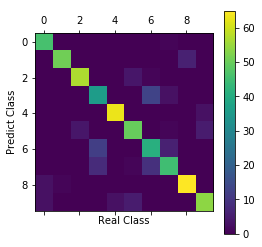

In [12]:
### CELL TO BE COMPLETED - Generate the report and confusion matrix for the test set.
y_pred_test = classifier.predict(x_test)
report_test = classification_report(y_true=y_test, y_pred=y_pred_test)
matrix_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
print('Prediction for test')
print(report_test)
print(matrix_test)
pl.matshow(matrix_test)
pl.colorbar()
pl.xlabel('Real Class')
pl.ylabel('Predict Class')

Finally we are going to plot the decision boundaries from our model. For this you should use the function plot_boundaries given below. You can only do this if the tensor representing your data is two dimensional.

This function will be testing our model with values ranging from the smallest x to the highest x and from the lowest y to the highest y each varying by $h$ and plotting it nicely. [Link to the original implementation](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

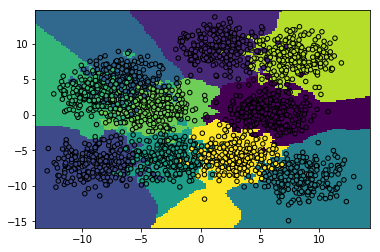

In [13]:
from matplotlib.colors import ListedColormap
def plot_boundaries(classifier,X,Y,h=0.2):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = classifier.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    pl.figure()
    pl.pcolormesh(x0, x1, Z)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    pl.xlim(x0.min(), x0.max())
    pl.ylim(x1.min(), x1.max())
plot_boundaries(classifier,x_train,y_train)

Generating PyRat datasets
--
First and foremost you need the latest version of PyRat. To do that, just clone the [official PyRat repository](https://github.com/vgripon/pyrat). 

Syntax is "git clone repo destinationdir"

In [14]:
### TO DO : open a terminal tab / window and clone the repo.

You can now launch Pyrat Games. 

In the context of the AI course, we are going to simplify the rules of PyRat a bit.
In fact, we are going to remove all walls and mud penalties. Also, we are not going to consider symmetric mazes anymore.

As such, a default game would be obtained with the following parameters:
<pre>python3 pyrat.py -p 40 -md 0 -d 0 --nonsymmetric</pre>

In the supervised and unsupervised projects, we are going to obtain data while looking at plays between two greedy algorithms. Generating 1000 such games while saving data is easily obtained with PyRat by using:
<pre>python3 pyrat.py -p 40 -md 0 -d 0 --nonsymmetric --rat AIs/manh.py --python AIs/manh.py --tests 1000 --nodrawing --synchronous --save</pre>

We recommend that you open another Terminal to launch this command, because generating 1000 games will take a few minutes, and you won't be able to evaluate any other cell from the jupyter notebook. 

It is possible to open a terminal window from the "Home" Interface of Jupyter Notebook.

PS: If you don't have pygame installed in your machine you can open a terminal and run

<pre>pip install pygame</pre>


The 1000 generated games will be in the "saves" folder.

In [15]:
### TO DO : open a terminal tab / window and launch the command to generate the games

To convert the games into numpy arrays, we will make use of a few functions that we define here. Feel try to modify it later to your own needs. 

In [16]:


mazeHeight = 15
mazeWidth = 21


def convert_input(maze, mazeWidth, mazeHeight, piecesOfCheese):
    im_size = (mazeWidth, mazeHeight) 
    canvas = np.zeros(im_size,dtype=np.int8)
    for (x_cheese,y_cheese) in piecesOfCheese:
        canvas[x_cheese,y_cheese] = 1
    # For use with sklearn, we flatten the matrix into an vector
    return canvas.ravel()

PHRASES = {
    "# Random seed\n": "seed",
    "# MazeMap\n": "maze",
    "# Pieces of cheese\n": "pieces"    ,
    "# Rat initial location\n": "rat"    ,
    "# Python initial location\n": "python"   , 
    "rat_location then python_location then pieces_of_cheese then rat_decision then python_decision\n": "play"
}
 
MOVE_DOWN = 'D'
MOVE_LEFT = 'L'
MOVE_RIGHT = 'R'
MOVE_UP = 'U'
 
translate_action = {
    MOVE_LEFT:0,
    MOVE_RIGHT:1,
    MOVE_UP:2,
    MOVE_DOWN:3
}
 
def process_file(filename):
    f = open(filename,"r")    
    info = f.readline()
    params = dict(play=list())
    while info is not None:
        if info.startswith("{"):
            params["end"] = ast.literal_eval(info)
            break
        if "turn " in info:
            info = info[info.find('rat_location'):]
        if info in PHRASES.keys():
            param = PHRASES[info]
            if param == "play":
                rat = ast.literal_eval(f.readline())
                python = ast.literal_eval(f.readline())
                pieces = ast.literal_eval(f.readline())
                rat_decision = f.readline().replace("\n","")
                python_decision = f.readline().replace("\n","")
                play_dict = dict(
                    rat=rat,python=python,piecesOfCheese=pieces,
                    rat_decision=rat_decision,python_decision=python_decision)
                params[param].append(play_dict)
            else:
                params[param] = ast.literal_eval(f.readline())
        else:
            print("did not understand:", info)
            break
        info = f.readline()
    return params

Now we are ready to parse the "saves" folder in order to generate the data into a numpy array. 

**N.b. you don't have to run this cell if you want to just run through the provided correction of TP1, we provide a npz file with a saved dataset**

In [17]:

games = list()
directory = "/home/pierre-jean/Vaults/Cours/IMT_2a/IA/pyrat/saves/"
for root, dirs, files in os.walk(directory):
    for filename in tqdm.tqdm(files):
        try:
            if filename.startswith("."):
                continue
            game_params = process_file(directory+filename)
            games.append(game_params)
        except:
            print("Filename {} did not work".format(filename))

x = np.array([]).reshape(0,mazeWidth * mazeHeight)
y = np.array([]).reshape(0,1)
wins_python = 0
wins_rat = 0
for game in tqdm.tqdm(games):
    if game["end"]["win_python"] == 1: 
        wins_python += 1
    elif game["end"]["win_rat"] == 1:
        wins_rat += 1    
    canvas = convert_input(game["maze"], mazeWidth, mazeHeight, game["play"][0]["piecesOfCheese"])
    if game["end"]["win_python"] == 1:
        y = np.append(y,1)
    elif game["end"]["win_rat"] == 1:
        y = np.append(y,-1)
    else:
        y = np.append(y,0)
    x = np.concatenate([x, canvas.reshape(1,-1)], axis=0)

100%|██████████| 1000/1000 [00:00<00:00, 2091.30it/s]


x and y are numpy array, feel free to save them to a .npz file as seen in TP0. 

In [18]:
### CELL TO BE COMPLETED
### CHECK THE SHAPES OF X AND Y 
### SAVE X AND Y IN A NPZ FILE 
print(x.shape)

(1000, 315)


Predicting the winner in PyRat based on the initial cheese configuration
--

Now it is your turn, generate a pyrat dataset, load it in the notebook and evaluate a KNN classifier using sklearn


In [71]:
k=1
classi = KNeighborsClassifier(n_neighbors=k,n_jobs=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(800, 315) (200, 315)


In [20]:
classi.fit(X_train, Y_train )
classi.score(X_train, Y_train)
classi.score(X_test, Y_test)

0.485

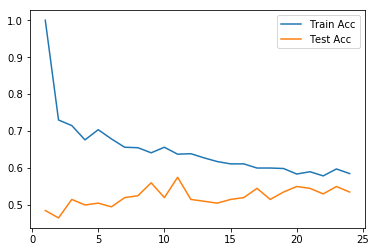

In [21]:
list_k = range(1, 25)
test_acc = list()
train_acc = list()

for k in list_k:
    classi_k = KNeighborsClassifier(n_neighbors=k,n_jobs=1)
    classi_k.fit(X_train, Y_train)
    test_acc.append(classi_k.score(X_test, Y_test))
    train_acc.append(classi_k.score(X_train, Y_train))

pl.figure()
pl.plot(list_k, train_acc, label='Train Acc')
pl.plot(list_k, test_acc, label='Test Acc')
pl.legend()
pl.show()

Training Set:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       368
         0.0       1.00      1.00      1.00        47
         1.0       1.00      1.00      1.00       385

   micro avg       1.00      1.00      1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

[[368   0   0]
 [  0  47   0]
 [  0   0 385]]


Text(0, 0.5, 'Predicted class')

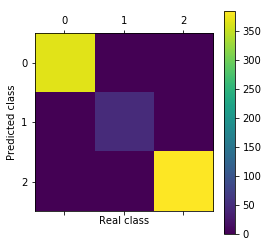

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred_train = classi.predict(X_train)
report = classification_report(y_true=Y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=Y_train,y_pred=y_pred_train)
print("Training Set:")
print(report)
print(matrix)
pl.matshow(matrix)
pl.colorbar()
pl.xlabel("Real class")
pl.ylabel("Predicted class")

Prediction for test
              precision    recall  f1-score   support

        -1.0       0.48      0.53      0.51        92
         0.0       0.00      0.00      0.00         7
         1.0       0.54      0.48      0.51       101

   micro avg       0.48      0.48      0.48       200
   macro avg       0.34      0.34      0.34       200
weighted avg       0.49      0.48      0.49       200

[[49  6 37]
 [ 3  0  4]
 [50  3 48]]


Text(0, 0.5, 'Predict Class')

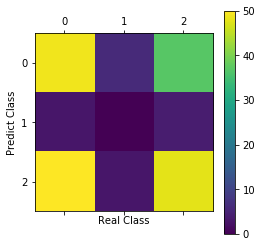

In [23]:
### CELL TO BE COMPLETED - Generate the report and confusion matrix for the test set.
y_pred_test = classi.predict(X_test)
report_test = classification_report(y_true=Y_test, y_pred=y_pred_test)
matrix_test = confusion_matrix(y_true=Y_test, y_pred=y_pred_test)
print('Prediction for test')
print(report_test)
print(matrix_test)
pl.matshow(matrix_test)
pl.colorbar()
pl.xlabel('Real Class')
pl.ylabel('Predict Class')

## Utilisation de la methode SVM

### Modèle linéaire
#### LinearSVC

Score for linear SVM : 0.585
Prediction for test
              precision    recall  f1-score   support

        -1.0       0.57      0.63      0.60        92
         0.0       0.00      0.00      0.00         7
         1.0       0.60      0.58      0.59       101

   micro avg       0.58      0.58      0.58       200
   macro avg       0.39      0.40      0.40       200
weighted avg       0.57      0.58      0.57       200

[[58  0 34]
 [ 2  0  5]
 [42  0 59]]


/home/pierre-jean/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0, 0.5, 'Predict Class')

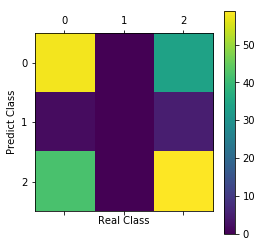

In [65]:
from sklearn.svm import LinearSVC
C = 0.01
linear_model = LinearSVC(C=C)
linear_model.fit(X_train, Y_train)
print('Score for linear SVM : ' + str(linear_model.score(X_test, Y_test)))
linear_prediction = linear_model.predict(X_test)
linear_report = classification_report(y_true=Y_test, y_pred=linear_prediction)
linear_matrix = confusion_matrix(y_true=Y_test, y_pred=linear_prediction)
print('Prediction for test')
print(linear_report)
print(linear_matrix)
pl.matshow(linear_matrix)
pl.colorbar()
pl.xlabel('Real Class')
pl.ylabel('Predict Class')

#### Influence of C

/home/pierre-jean/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


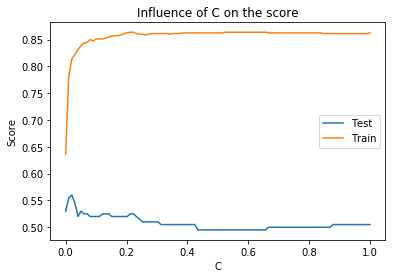

In [90]:
list_C = np.linspace(0.00001, 1, 100)
list_score = list()
list_train = list()
for C in list_C:
    linear_model_C = LinearSVC(C=C)
    linear_model_C.fit(X_train, Y_train)
    list_score.append(linear_model_C.score(X_test, Y_test))
    list_train.append(linear_model_C.score(X_train, Y_train))
    
pl.figure()
pl.plot(list_C, list_score, label='Test')
pl.plot(list_C, list_train, label='Train')
pl.legend()
pl.xlabel('C')
pl.ylabel('Score')
pl.title('Influence of C on the score')
pl.show()

### Modèle polynomial
#### Degrés 2

/home/pierre-jean/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score for Poly2 SVM : 0.5
Prediction for test
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        86
         0.0       0.00      0.00      0.00        14
         1.0       0.50      1.00      0.67       100

   micro avg       0.50      0.50      0.50       200
   macro avg       0.17      0.33      0.22       200
weighted avg       0.25      0.50      0.33       200

[[  0   0  86]
 [  0   0  14]
 [  0   0 100]]


/home/pierre-jean/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0, 0.5, 'Predict Class')

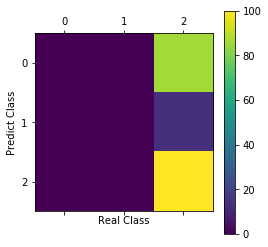

In [102]:
from sklearn.svm import SVC
degree = 10
C = 0.0001
poly2_model = SVC(kernel='poly', degree=degree) 
poly2_model.fit(X_train, Y_train)
print('Score for Poly2 SVM : ' + str(poly2_model.score(X_test, Y_test)))
poly2_prediction = poly2_model.predict(X_test)
poly2_report = classification_report(y_true=Y_test, y_pred=poly2_prediction)
poly2_matrix = confusion_matrix(y_true=Y_test, y_pred=poly2_prediction)
print('Prediction for test')
print(poly2_report)
print(poly2_matrix)
pl.matshow(poly2_matrix)
pl.colorbar()
pl.xlabel('Real Class')
pl.ylabel('Predict Class')

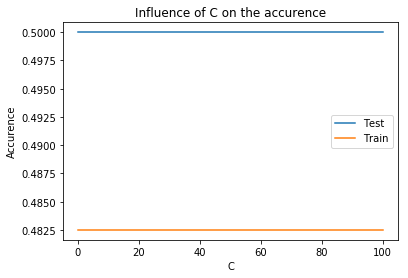

In [106]:
list_C = np.linspace(0.1, 100, 100)
acc_test = list()
acc_train = list()
for C in list_C:
    poly_model_C = SVC(C=C, kernel='poly', degree=3, gamma='auto')
    poly_model_C.fit(X_train, Y_train)
    acc_test.append(poly_model_C.score(X_test, Y_test))
    acc_train.append(poly_model_C.score(X_train, Y_train))

pl.figure()
pl.plot(list_C, acc_test, label='Test')
pl.plot(list_C, acc_train, label='Train')
pl.legend()
pl.xlabel('C')
pl.ylabel('Accurence')
pl.title('Influence of C on the accurence')
pl.show()


### Modèle RBF

/home/pierre-jean/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score for rbf SVM : 0.56
Prediction for test
              precision    recall  f1-score   support

        -1.0       0.54      0.58      0.56        86
         0.0       0.00      0.00      0.00        14
         1.0       0.58      0.62      0.60       100

   micro avg       0.56      0.56      0.56       200
   macro avg       0.37      0.40      0.39       200
weighted avg       0.52      0.56      0.54       200

[[50  1 35]
 [ 5  0  9]
 [38  0 62]]


Text(0, 0.5, 'Predict Class')

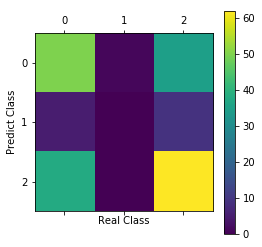

In [100]:
from sklearn.svm import SVC
C = 14
rbf_model = SVC(C=C) 
rbf_model.fit(X_train, Y_train)
print('Score for rbf SVM : ' + str(rbf_model.score(X_test, Y_test)))
rbf_prediction = rbf_model.predict(X_test)
rbf_report = classification_report(y_true=Y_test, y_pred=rbf_prediction)
rbf_matrix = confusion_matrix(y_true=Y_test, y_pred=rbf_prediction)
print('Prediction for test')
print(rbf_report)
print(rbf_matrix)
pl.matshow(rbf_matrix)
pl.colorbar()
pl.xlabel('Real Class')
pl.ylabel('Predict Class')

#### Influence of C

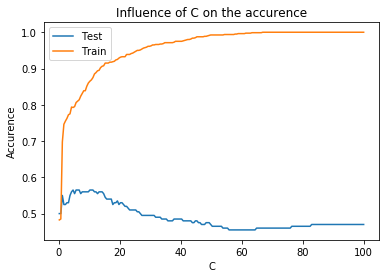

In [95]:
list_C = np.linspace(0.1, 100, 200)
acc_test = list()
acc_train = list()
for C in list_C:
    rbf_model_C = SVC(C=C, kernel='rbf', gamma='auto')
    rbf_model_C.fit(X_train, Y_train)
    acc_test.append(rbf_model_C.score(X_test, Y_test))
    acc_train.append(rbf_model_C.score(X_train, Y_train))

pl.figure()
pl.plot(list_C, acc_test, label='Test')
pl.plot(list_C, acc_train, label='Train')
pl.legend()
pl.xlabel('C')
pl.ylabel('Accurence')
pl.title('Influence of C on the accurence')
pl.show()


### Sigmoid

/home/pierre-jean/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score for sigmoid SVM : 0.555
Prediction for test
              precision    recall  f1-score   support

        -1.0       0.53      0.57      0.55        86
         0.0       0.00      0.00      0.00        14
         1.0       0.58      0.62      0.60       100

   micro avg       0.56      0.56      0.56       200
   macro avg       0.37      0.40      0.38       200
weighted avg       0.52      0.56      0.54       200

[[49  1 36]
 [ 6  0  8]
 [38  0 62]]


Text(0, 0.5, 'Predict Class')

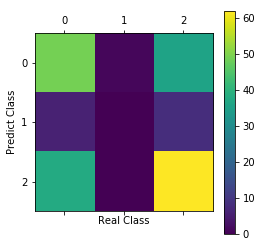

In [110]:
from sklearn.svm import SVC
C = 14
sig_model = SVC(C=C, kernel='sigmoid') 
sig_model.fit(X_train, Y_train)
print('Score for sigmoid SVM : ' + str(sig_model.score(X_test, Y_test)))
sig_prediction = sig_model.predict(X_test)
sig_report = classification_report(y_true=Y_test, y_pred=sig_prediction)
sig_matrix = confusion_matrix(y_true=Y_test, y_pred=sig_prediction)
print('Prediction for test')
print(sig_report)
print(sig_matrix)
pl.matshow(sig_matrix)
pl.colorbar()
pl.xlabel('Real Class')
pl.ylabel('Predict Class')

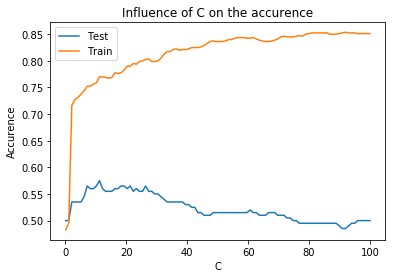

In [107]:
list_C = np.linspace(0.1, 100, 100)
acc_test = list()
acc_train = list()
for C in list_C:
    sig_model_C = SVC(C=C, kernel='sigmoid', gamma='auto')
    sig_model_C.fit(X_train, Y_train)
    acc_test.append(sig_model_C.score(X_test, Y_test))
    acc_train.append(sig_model_C.score(X_train, Y_train))

pl.figure()
pl.plot(list_C, acc_test, label='Test')
pl.plot(list_C, acc_train, label='Train')
pl.legend()
pl.xlabel('C')
pl.ylabel('Accurence')
pl.title('Influence of C on the accurence')
pl.show()


## A few more things to test (perspectives for P1 project) 
- Trying to make a binary classification between Pyrat and python wins
- Trying to improve the classification performance of draw class by using a balanced dataset for the three classes (i.e. try to have the same number of examples in each class)
- Trying to change the parameters of the maze such as, mazeWidth, mazeHeight, piecesOfCheese,... 


*When working on your project P1, we expect you to investigate these last questions in order to explore the method you chose.*

Part 2 - Playing PyRat using Machine Learning by training a classifier to predict the next movement to play (or - Supervised Baseline for Pyrat Challenge)
--

In the folder of the TP, in addition to this notebook, you'll find a subfolder "supervised play". 

Go into this folder to find a few files that you have to complete, in order to setup the training of a classifier to play pyrat!

Precisely, you have to complete the following files : 
- utils.py
- train.py